<a href="https://colab.research.google.com/github/aneeshcheriank/approaching-any-machine-learning-problem/blob/main/Arranging_Machine_Learning_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Folder Structure

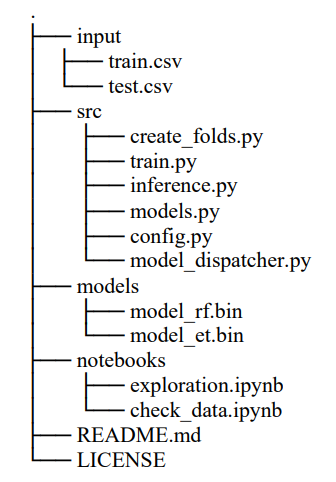

## input
- all the input for the model
- for NLP project you can place your embeddings here

## src
- all python scripts

## models
- trained models

## notebooks
- All jupyter notebooks

## README.md
- mardown file
- project description
- how to train the model or to serve this in a production environment

## LICENSE
- license of the project
  - MIT
  - Apache
